Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt
# figure parameters
plt.rcParams['figure.dpi'] = 150

In [3]:
%matplotlib inline

In [4]:
# sympy
import sympy as sy
from sympy import symbols
from sympy import simplify, expand, collect, cancel, apart, trigsimp
from sympy import integrate, diff, series
sy.init_printing(use_unicode = True)

# Rotations en trois dimensions

In [5]:
phi, theta, psi = symbols("phi, theta, psi", real=True)
alpha, beta, gamma = symbols("alpha, beta, gamma", real=True)

# Matrixe identité
Id = sy.Matrix([[1,  0, 0],
                [0, 1, 0],
                [0, 0, 1]])
# Base canonique
e_x = Id[:,0]
e_y = Id[:,1]
e_z = Id[:,2]

# Matrices de rotaion autour des axes X, Y, Z
def R_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, -s],
                  [0, s,  c]])
def R_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, s],
                  [ 0, 1, 0],
                  [-s, 0, c]])

def R_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

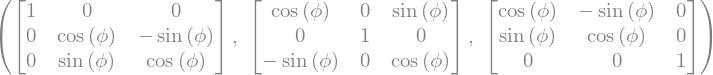

In [6]:
R_x(phi), R_y(phi), R_z(phi)

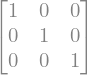

In [7]:
Id

In [8]:
# angle de rotation cos(phi) = (tr(R)-1)/2
sy.Rational(1,2)*(sy.trace(R_x(phi)) - 1)

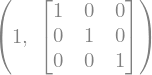

In [11]:
# la matrice de rotation est orthogonale de determinant 1
sy.simplify( sy.det(R_x(phi)) ), simplify(R_x(phi).T * R_x(phi) )

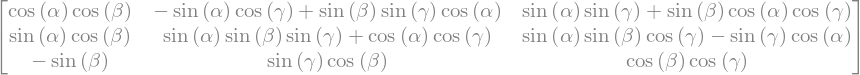

In [12]:
# Tait-Bryan alpha (lacet) beta (tangage) et gamma (roulis)
R_z(alpha) * R_y(beta) * R_x(gamma)

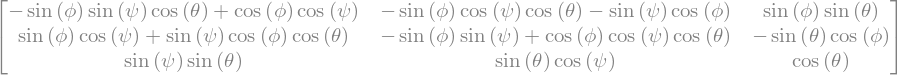

In [13]:
# Angles d'Euler phi, theta et psi
euler = R_z(phi) * R_x(theta) * R_z(psi)
euler

In [14]:
euler[2,2]

## Formule d'Euler-Rodrigues

#### La rotation d'un vecteur $r = (x, y, z)$ d'un angle infinitésimal $\D a$ autour d'un axe $\bm n = (n_x, n_y, n_z)$ de norme 1 ($n^2 = 1$), s'écrit
$$\bm r' = \bm r + \D r = \bm r + \D a \, \bm n \times \bm r$$
Pour trouver la rotation d'un angle $a$ on va utiliser une représentation du produit vectoriel. Soit $\bm e = (\bm e_x, \bm e_y, \bm e_z)$ une base canonique de $\mathbb{R}^3$; on défini l'application $\bm L = (L_x, L_y, L_z)$ (reliée au moment cinétique) par
\begin{align*}
L_x \bm r &= \bm e_x \times \bm r \\
L_y \bm r &= \bm e_y \times \bm r \\
L_z \bm r &= \bm e_z \times \bm r
\end{align*}
On en déduit:
\begin{align*}
L_x &= \begin{pmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{pmatrix} \\
L_y &= \begin{pmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ -1 & 0 & 0 \end{pmatrix} \\
L_z &= \begin{pmatrix} 0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 0 \end{pmatrix}
\end{align*}
Le produit scalaire $\bm L \cdot \bm n$ satisfait,
$$\bm L \cdot \bm n = \begin{pmatrix} 0 & -n_z & n_y \\ n_z & 0 & -n_x \\ -n_y & n_x & 0 \end{pmatrix}$$
ce qui donne la représentation du prouit vectoriel comme une matrice antisymétrique:
$$(\bm L \cdot \bm n) \bm r = \bm n \times \bm r$$

Une rotation d'angle $a$ autour d'un axe $\bm n$ peut donc s'écrire:
$$\bm r' = \lim_{n \rightarrow \infty} \left(1 + \frac{a}{N} \bm L \cdot \bm n \right)^N \bm r$$
où on a utilisé $a/N \rightarrow \D a$ pour $N \rightarrow \infty$. Par conséquant, on définit la matrice de rotation comme:
$$R_{\bm n}(a) = \E^{a (\bm L \cdot \bm n)}$$ 
telle que 
$$\bm r' = R_{\bm n}(a) \bm r$$
Il est remarquable qu'on puisse calculer explicitement cette exponentielle. En effet, on a l'identité:
$$(\bm L \cdot \bm n)^3 = - \bm L \cdot \bm n$$
ce qui a pour conséquence que la série de l'exponentielle ne contient que les puissances 0, 1 et 2 de $(\bm L \cdot \bm n)$:
$$\E^{a (\bm L \cdot \bm n)} = R_{\bm n}(a) = I + \sin(a) (\bm L \cdot \bm n) + [1 - \cos(a)] (\bm L \cdot \bm n)^2$$
Ce qui nous donne la formule d'Euler-Rodrigues:
$$R_{\bm n}(a)\bm r = \E^{a (\bm L \cdot \bm n)} \bm r = (\bm n \cdot \bm r) \bm n + \cos(a) (\bm n \times \bm r) \times \bm n + \sin(a) (\bm n \times \bm r)$$

En notant que 
$$(\bm L \cdot \bm n)^2 = \bm n \bm n^{T} - I$$
on peut séparer la matrice de rotation comme la somme de trois matrices:
$$R_{\bm n}(a) = \cos(a) I + [1 - \cos(a)] \bm n \bm n^{T} + \sin(a) (\bm L \cdot \bm n)$$


In [7]:
# Euler-Rodrigez, matrice de rotation R_n(a)
def ER(a, n):
    n_x, n_y, n_z = n[0], n[1], n[2]
    Ln = sy.Matrix([[   0, -n_z,  n_y],
                    [ n_z,    0, -n_x],
                    [-n_y,  n_x,    0]])
    Id = sy.Matrix([[1,  0, 0],
                    [0, 1, 0],
                    [0, 0, 1]])
    return sy.simplify(sy.cos(a)*Id + (1 - sy.cos(a))*n*n.T + sy.sin(a)*Ln)

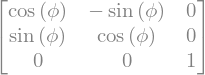

In [49]:
# Exemple

ER(phi, e_z)

In [8]:
# matrice uL = n_x L_x + n_y L_y + n_z L_z
(x, y, z) = symbols("x, y, z", real=True)
(n_x, n_y, n_z) = symbols("n_x, n_y, n_z", real=True)
uL = sy.Matrix([[   0, -n_z,  n_y],
                [ n_z,    0, -n_x],
                [-n_y,  n_x,    0]])

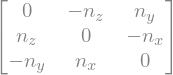

In [16]:
uL

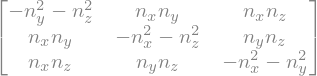

In [17]:
uL * uL

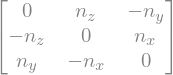

In [18]:
simplify(uL * uL * uL).subs(n_x**2 + n_y**2 + n_z**2,1)

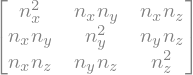

In [9]:
# matrice nn^T
n = sy.Matrix([[n_x],[n_y],[n_z]])
n * n.T

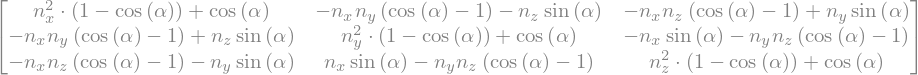

In [20]:
# Matrice d'Euler-Rodrigues
R_n = sy.simplify( 
    sy.cos(alpha)*Id + 
    (1 - sy.cos(alpha)) * n * n.T + 
    sy.sin(alpha) * uL)
R_n

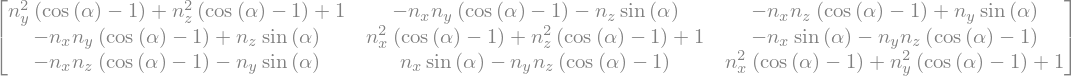

In [21]:
# formule équivalente de R_n
sy. simplify(
    sy.Matrix(np.diag([1,1,1])) + 
    sy.sin(alpha) * uL + 
    (1 - sy.cos(alpha)) * uL * uL)

On aborde maintenant le problème inverse, celui de trouver l'axe et l'angle de rotation à partir de la matrice $R$. On voit inmédiatement que la trace de $R$ contient l'information sur l'angle:
$$\mathrm{Tr} R = 1 + 2 \cos(a)$$
Le calcul de $\bm n$ est aussi directe: il suffit de regarder les termes en $\sin (a)$, qui sont linéaires en $\bm n$, par exemple,
$$R_{32} - R_{23} = 2\sin(a) n_x, \; R_{13} - R_{31} = 2\sin(a) n_y, \; R_{21} - R_{12} = 2\sin(a) n_z$$
d'où on déduit:
$$\bm n = \frac{1}{2 \sin(a)} \begin{pmatrix} R_{32} - R_{23} \\ R_{13} - R_{31} \\ R_{21} - R_{12} \end{pmatrix}$$
Le cas $a=\pi$ correspond à 
$$R=  I - 2 (\bm L \cdot \bm n)^2 = -I + \bm n \bm n^T$$
donc, les vecteurs colonne de $R + I$ sont proportionnels à $\bm n$.

# TD1 matrice de rotation

On commence par écrire la matrice R.

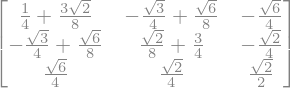

In [11]:
r2 = sy.sqrt(2)
r3 = sy.sqrt(3)
r6 = sy.sqrt(6)
R = sy.Rational(1,8)*sy.Matrix([[2 + 3*r2, r6 - 2*r3, -2*r6],
               [r6 - r6*r2, 6 + r2, -2*r2],
               [2*r6, 2*r2, 4*r2]])
R

On définit les vecteurs de la base canonique

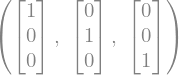

In [12]:
Id = sy.eye(3) # matrice identité
e_x = Id[:,0]
e_y = Id[:,1]
e_z = Id[:,2]

e_x, e_y, e_z

**Question 1:** montrer que R est une matrice de rotation:
$$R^T = R^{-1}, \quad \det R = 1$$

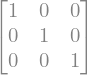

In [13]:
sy.simplify(R*R.T)

In [14]:
sy.det(R)

In [20]:
sy.simplify(R[:,0].T*R[:,1])

**Question 2:** trouve l'angle et l'axe de rotation $(a, \bm u)$

On utilise les formules:
$$\cos a = \frac{1}{2}( \mathrm{tr} R - 1)$$
et
$$\bm u = \frac{1}{2 \sin(a)} \begin{pmatrix} R_{32} - R_{23} \\ R_{13} - R_{31} \\ R_{21} - R_{12} \end{pmatrix}$$

In [27]:
(sy.trace(R) - 1)/2

In [28]:
# calcul de langle a
a = sy.acos((sy.trace(R) - 1)/2)
a

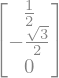

In [29]:
# calcul du vecteur u
u = 1/(2*sy.sin(a)) * ((R[2,1] - R[1,2])*e_x + (R[0,2] - R[2,0])*e_y + (R[1,0] - R[0,1])*e_z)
u

**Question 3** On vérifie que la formule d'Euler-Rodrigues 
$$R_{\bm u}(a) = \cos(a) I + [1 - \cos(a)] \bm u \bm u^{T} + \sin(a) (\bm L \cdot \bm u)$$
avec les $a$ et $\bm u$ calculés, donne bien la mtrice $R$. Dans cette formule $\bm L = (L_x, L_y, L_z)$ est un vecteur de trois matrices qui permet de calculer le produit vectoriel:
$$\bm L \cdot \bm u = \begin{pmatrix} 0 & -u_z & u_y \\ u_z & 0 & -u_x \\ -u_y & u_x & 0 \end{pmatrix}$$
Par exemple 
$$ \bm u \wedge \bm v = (\bm L \cdot \bm u) \bm v$$

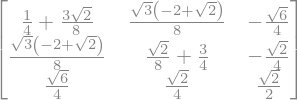

In [30]:
# vérification
# R = cos(a) I + [1 - cos(a)] n nT + sin(a) Ln
u_x, u_y, u_z = u[0], u[1], u[2]
Lu = sy.Matrix([[   0, -u_z,  u_y],
                [ u_z,    0, -u_x],
                [-u_y,  u_x,    0]])

RR = sy.simplify(sy.cos(a)*Id + (1 - sy.cos(a)) * u * u.T + sy.sin(a) * Lu)
RR

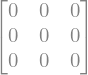

In [31]:
sy.simplify(RR - R)

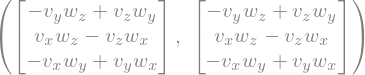

In [14]:
# Exemple de produit vectoriel
v_x, v_y, v_z = symbols("v_x, v_y, v_z", real = True)
w_x, w_y, w_z = symbols("w_x, w_y, w_z", real = True)
v = v_x*e_x + v_y*e_y + v_z*e_z
w = w_x*e_x + w_y*e_y + w_z*e_z
Lw = sy.Matrix([[   0, -w_z,  w_y],
                [ w_z,    0, -w_x],
                [-w_y,  w_x,    0]])
Lw * v, w.cross(v)

**Question 4:** On calcule à partir de la matrice R les angles $(\phi, \theta, \psi)$ de Euler.

On utilise la fonction $\mathrm{atan}(y,x)$ qui donne l'angle dans le bon quadrant:

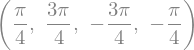

In [33]:
# atan2(y,x)
# quadrant 1, 2, 3, et 4:
sy.atan2(1,1), sy.atan2(1,-1), sy.atan2(-1,-1), sy.atan2(-1,1)

Les angles d'Euler satisfont:
\begin{gather}
\phi = \arctan(R_{13}, -R_{23}) \\
\theta = \arccos(R_{22}) \\
\psi = \arctan(R_{31}, R_{13})
\end{gather}

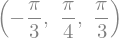

In [34]:
# angles d'Euler
# phi = -atan2(R13, -R23)
# theta = acos(R33)
# psi = atan2(R31, R32)

phi0 = sy.atan2(R[0,2], -R[1,2])
theta0 = sy.acos(R[2,2])
psi0 = sy.atan2(R[2,0], R[2,1])
phi0, theta0, psi0

On vérifie le résultat: on doit obtenir la matrice R en utilisant $(\phi,\theta,\psi)$

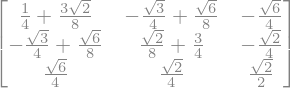

In [35]:
sy.simplify(R_z(phi0) * R_x(theta0) * R_z(psi0))

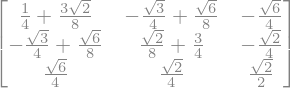

In [36]:
R

**Question 5:** On calcule à l'aide des formules:
$$R_{\bm e_3}(\psi) \bm e_1 = \bm u$$
et
$$R_{\bm u}(\psi) \bm e_3 = \bm n$$
les axes $\bm u$ (ne pas confondre avec le u précédent) et $\bm n$ de la rotation d'Euler

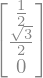

In [37]:
# axe N
u_euler = ER(psi0, e_z)*e_x
u_euler

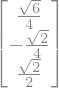

In [38]:
n_euler = ER(theta0, u_euler)*e_z
n_euler

On vérifie le cas général: trois rotations de Euler-Rodrigues selon les axes $\bm e_z, \bm u$ et $\bm n$, donnent la matrice de rotationd'Euler:

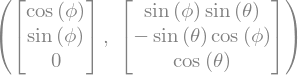

In [47]:
u_euler = ER(phi, e_z)*e_x
n_euler = ER(theta, u_euler)*e_z
u_euler, n_euler

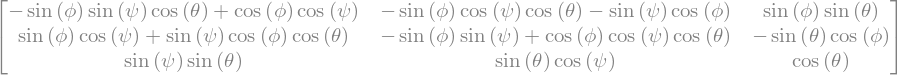

In [48]:
sy.simplify( ER(phi, n_euler)*ER(theta, u_euler)*ER(psi, e_z) )

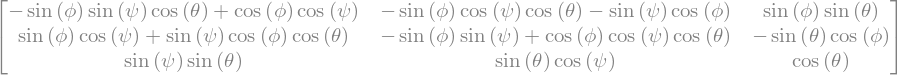

In [44]:
euler

# Matrice de passage

### Questions

On considère
* Base canonique: $(\bm e_x, \bm e_y, \bm e_z)$
* Angles "sphériques": $\phi \in (0,2\pi]$, et $\theta \in [0,\pi]$

**Question 1:** représenter les vecteurs,
$$\bm u = R_{\bm e_z}(\phi) \bm e_x, \; \bm v = R_{\bm e_z}(\phi) \bm e_y, \bm w = R_{\bm e_z}(\phi) \bm e_z$$

**Question 2:** et les vecteurs,
$$\bm e_r = R_{\bm v}(\theta) \bm e_z, \; \bm e_\theta = R_{\bm v}(\theta) \bm u, \bm e_\phi = R_{\bm v}(\theta) \bm v$$

In [251]:
# calcul des vecteurs de la base (u v w) et (r theta phi)
e_u = ER(phi, e_z) * e_x
e_v = ER(phi, e_z) * e_y
e_w = ER(phi, e_z) * e_z

e_r = ER(theta, v) * e_z
e_theta = sy.simplify( ER(theta, e_v) * e_u )
e_phi = sy.simplify( ER(theta, e_v) * e_v )

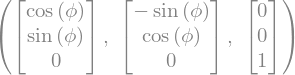

In [252]:
e_u, e_v, e_w

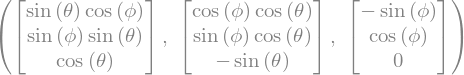

In [253]:
e_r, e_theta, e_phi # base sphérique

**Question 3** donner $R_z = R_{\bm e_z}(\phi)$

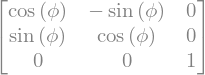

In [68]:
ER(phi, e_z)

**Question 4:** donner $R_{\bm v}(\theta)$, exprimée dans la base canonique

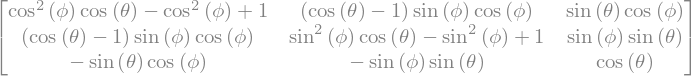

In [69]:
sy.simplify(sy.expand(ER(theta, v)))

**Question 5:** donner la matrice de passage de la base canonique à la base sphérique

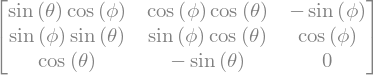

In [70]:
s = e_r.row_join(e_theta).row_join(e_phi)
s

La matrice de passage satisfait:
$$\begin{pmatrix}\bm e_x \\ \bm e_y\\ \bm e_z \end{pmatrix} =
\begin{pmatrix} \sin\theta \cos\phi & \cos\theta \cos\phi & -\sin\phi \\
                \sin\theta \sin\phi & \cos\theta \sin\phi &  \cos\phi \\
                \cos\theta          & -\sin\theta         &  0 \end{pmatrix}
\begin{pmatrix}\bm e_r \\ \bm e_\theta \\ \bm e_\phi \end{pmatrix}$$
elle permet d'écrire les vecteurs de la base cartesienne en termes de la base sphérique.

La matrice de rotation "sphérique" est la transposée de la matrice de passage:
$$R = \begin{pmatrix} \sin\theta \cos\phi & \sin\theta \sin\phi & \cos\theta \\
                \cos\theta \cos\phi & \cos\theta \sin\phi & -\sin\theta \\
                -\sin\phi          & \cos\phi         &  0 \end{pmatrix}$$
ou
$$\begin{pmatrix}\bm e_r \\ \bm e_\theta \\ \bm e_\phi \end{pmatrix} = R \begin{pmatrix}\bm e_x \\ \bm e_y\\ \bm e_z \end{pmatrix}$$